## TP3 - Meta-modèles et plus courts chemins
## Exercice I : Modéliser C. Elegans par le modèle d'Erdös-Rényi

Dans cet exercice, nous allons reproduire le travail des chercheurs Watts et Strogatz dans les années 90. À ce moment de l'histoire de la science des réseaux, le modèle d'Erdös-Rényi était le plus exploité pour simuler des graphes, et ainsi en étudier les propriétés. Néanmoins, les chercheurs ont petit à petit mis en évidence les faiblesses de ce modèle, en amenant des nouveaux. Si le modèle n'est plus aujourd'hui considéré comme un modèle fidèle et réaliste aux données qu'il est sensé synthétiser, il reste néanmoins courrament employé pour sa simplicité de mise en oeuvre et de compréhension.

Dans leur article `Collective dynamics of 'small-world' networks` publié dans la revue *Nature*, les physiciens Watts et Strogatz tentent de modéliser le réseau de neurones du ver C. Elegans par un modèle d'Erdös-Rényi, et ils montrent que certaines propriétés obtenues par ce modèle sont incohérentes par rapport aux données réelles.
Nous le verrons plus tard en cours, ces propriétés sont en particulier le coefficient de clustering et le diamètre. Néanmoins, nous allons voir que la distribution degré produit par le modèle n'est pas non plus fidèle au réseau initial.

Beginning file download with urllib2...


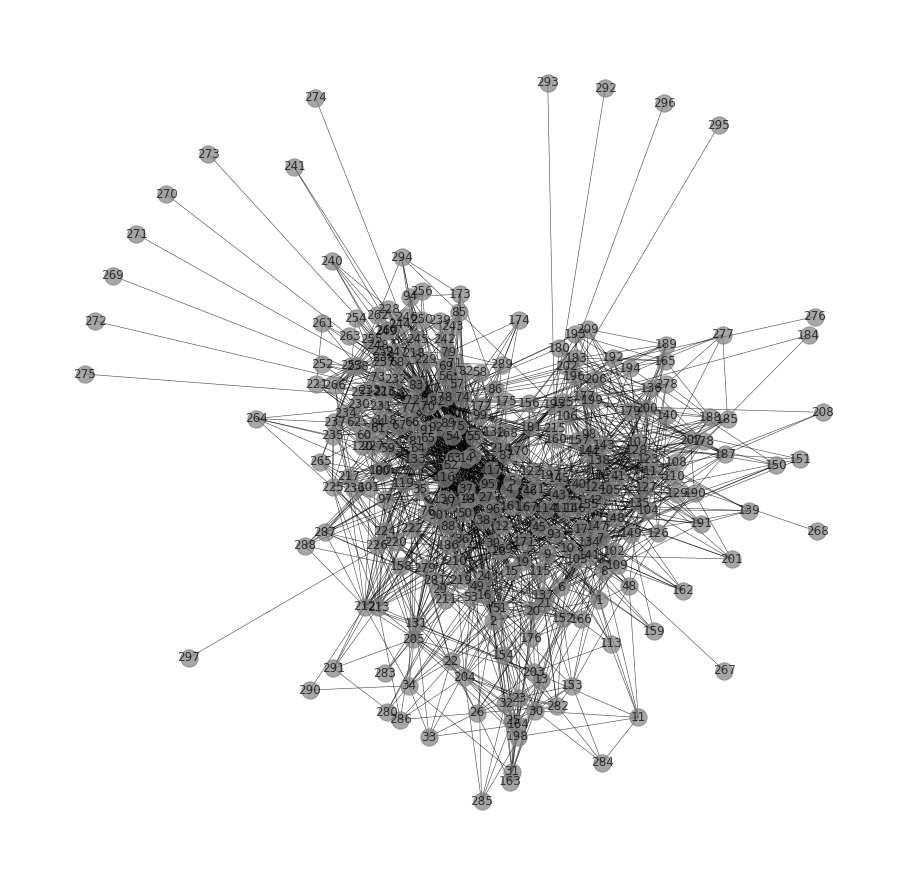

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request

print('Beginning file download with urllib2...')

url = 'http://konect.cc/files/download.tsv.dimacs10-celegansneural.tar.bz2'
urllib.request.urlretrieve(url, 'celegans.bz2')

import tarfile
tar = tarfile.open("celegans.bz2", "r:bz2")  
tar.extractall()
tar.close()

G = nx.read_weighted_edgelist("dimacs10-celegansneural/out.dimacs10-celegansneural",comments='%')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
nx.draw_spring(G, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()


### Exercice I.1 : Apprendre à connaître C. Elegans

Dans un premier temps, nous allons découvrir les propriétés qui correspondent au réseau de neurones de C. Elegans, avant ensuite de générer un graphe dont on espère qu'il sera capable de reproduire ces propriétés.

Pour commencer, imprimer le nombre de sommets et d'arêtes dans le graphe de C. Elegans chargé dans la cellule auparavant.

In [73]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO - nombre de sommets et d'arêtes
print(G.number_of_nodes())
print(G.number_of_edges())

297
2148


Quel est le degré moyen dans le graphe ? Vous pouvez vous aider de la fonction `mean` du package numpy.

In [74]:
import numpy as np
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO - degré moyen
np.mean(list(dict(G.degree).values()))
np.mean([d for _,d in G.degree])


14.464646464646465

Obtenir le degré des sommets. Puis, en utilisant `Counter` du package collections, récupérer le nombre de sommets correspondant à chaque degré. Utiliser la fonction `bar` de *matplotlib.pyplot* pour produire le barchart correspondant à la distribution des degrés.

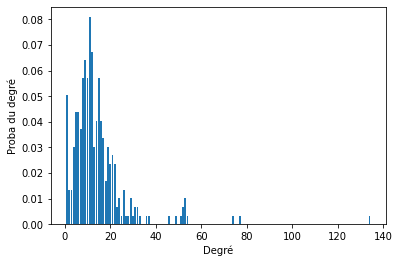

In [75]:
from collections import Counter 
def plot_degree(G_):
    import collections
    import numpy as np
    plt.figure()
    
    degrees = [d for _,d in G.degree]
    c=Counter(degrees)
    values=[v/np.sum(list(c.values())) for v in c.values()]
    
    plt.bar(c.keys(),values)
    plt.xlabel("Degré")
    plt.ylabel("Proba du degré")
    plt.show()
plot_degree(G)

### Exercice I.2 : Modéliser avec Erdös-Rényi

Maintenant, nous allons générer un graphe aléatoire dont les propriétés doivent imiter celles de C. Elegans.

Étant donné le nombre de sommets et d'arêtes, quels sont les paramètres que vous choisissez pour générer votre graphe aléatoire selon le modèle d'Erdös-Rényi ?

In [76]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO - CALCULER P ET DÉTERMINER L'AUTRE PARAMÈTRE
n=G.number_of_nodes()
m=G.number_of_edges()
p=m/(n*(n-1)/2)
print (p)


0.048867048867048866


Générer un graphe aléatoirement en utilisant le modèle d'Erdös-Rényi.

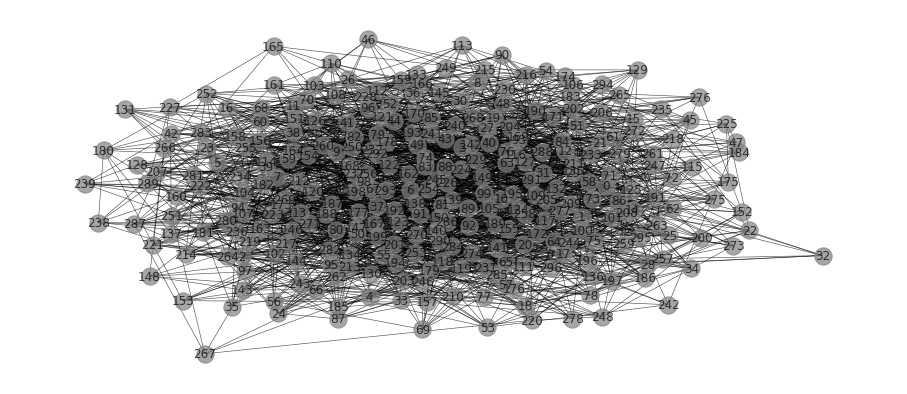

In [77]:
from networkx import erdos_renyi_graph
n=n
p=p

G=erdos_renyi_graph(n, p)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(16,7)
nx.draw_spring(G, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

Imprimer le nombre de sommets et d'arêtes dans le graphe généré aléatoirement. Ceux-ci correspondent-il (à quelques dizaines d'arêtes près) aux chiffres obtenus sur C. Elegans ?

In [78]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO
print(G.number_of_nodes())
print(G.number_of_edges())

297
2129


Quid du degré moyen sur le graphe généré aléatoirement ? Celui-ci correspond-il à celui obtenu sur C. Elegans ?

In [79]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO
print(np.mean([d for _,d in G.degree]))

14.336700336700337


Calculer la distribution des degrés sur le graphe généré aléatoirement. Celle-ci correspond-il à celle obtenue sur C. Elegans ?

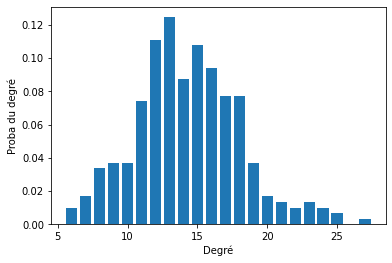

In [80]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO
plot_degree(G)

### Exercice I.3 : Vérifier l'espérance 

Deux lois binomiales servent à modéliser les propriétés du graphe en utilisant le modèle d'Erdös-Rényi : 
- La loi $\mathcal{B}(\frac{n \cdot (n-1)}{2}, p)$ qui sert à modéliser la quantité d'arêtes
- La loi $\mathcal{B}((n-1), p)$ qui sert à modéliser le degré des sommets

Pour ces deux lois, on obtient une espérance qui est à chaque fois le produit des deux paramètres : 
- $\frac{n \cdot (n-1)}{2} \cdot p$ modélise ainsi la quantité d'arêtes attendue **en moyenne** pour les graphes aléatoires générés avec ces paramètres
- $(n-1) \cdot p$ modélise ainsi le degré moyen attendu **en moyenne** pour les graphes aléatoires générés avec ces paramètres

Ainsi, lorsque l'on génère un seul graphe aléatoire, nous n'obtenons pas un nombre d'arêtes ou un degré moyen qui correspond à celui de l'espérance. En revanche, si l'on génère de nombreux graphes aléatoires et qu'on observe en moyenne leur nombre d'arêtes et le degré moyen des noeuds, alors ces deux valeurs devraient se rapprocher de l'espérance. C'est donc ce que nous allons faire !

Comment opérer : Il s'agit de générer un grand nombre de graphes aléatoires (par ex. 500) , et pour chacun de ces graphes, de stocker $m$ le nombre d'arêtes dans une `list`, et le degré moyen des sommets dans une autre `list`. Enfin, il ne reste qu'à faire la moyenne de ces deux listes.

Vous observerez que cette fois-ci, les valeurs correspondent à ce qui est observé dans le graphe de C. Elegans ! :)



In [81]:
from networkx import erdos_renyi_graph
import numpy as np
n=297
p=0.0489

mean_degree = list()
edges_number = list()
for i in range(500):
    G=erdos_renyi_graph(n, p)
    #TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO
    mean_degree.append(np.mean([d for _,d in G.degree]))
    edges_number.append(G.number_of_edges())
    
    
print(np.mean(mean_degree))
print(np.mean(edges_number))

14.476417508417507
2149.748


## Exercice II : Plus courts chemin et diamètre

Pour travailler sur l'algorithme de Dijkstra, quoi de mieux qu'un réseau routier réel ? Nous allons utiliser celui de la ville de Rome en Italie disponible sur la base de données de graphes https://icon.colorado.edu/.
Celle-ci se trouve à l'adresse suivante : http://www.diag.uniroma1.it//challenge9/data/rome/rome99.gr
Elle est au format liste d'arcs pondérés, les lignes qui commencent par un *a* sont des arcs, avec ensuite trois nombres : le premier est le noeud source, le second le noeud cible, et le dernier le poids du lien (une distance en mètres ici). Le graphe est donc **orienté** et **pondéré**. Pour créer des arêtes pondérées, on utilisera la méthode `G.add_edge(src, tgt, weight=poids)`. Pour plus d'infos sur cette méthode, taper `G.add_edge?` dans le notebook et afficher la documentation.

Utiliser les astuces données dans le TP2 pour télécharger le fichier via urllib.request (fonction `urlretrieve`) et ensuite créer un graphe orienté pondéré correspondant.



In [82]:
from urllib.request import urlretrieve
url = 'http://www.diag.uniroma1.it//challenge9/data/rome/rome99.gr'
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO - Télécharger le fichier
urlretrieve(url,"rome.gr")
import networkx as nx
G = nx.DiGraph()
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO - Lire le fichier et créer le graphe qui est orienté et pondéré
with open("rome.gr") as file:
    for ligne in file:
        ligne= ligne.strip()
        tab=ligne.split(" ")
        if tab[0]=="a":
            tab=tab[1:]
            src=tab[0]
            dst=tab[1]
            w=tab[2]
            G.add_edge(src,dst,weight=float(w))
#Imprime le nombre de sommets, d'arêtes et la somme des poids des arêtes du graphe
print(G.number_of_nodes())
print(G.number_of_edges())
print(G.size(weight="weight"))

3353
8859
4716444.0


Maintenant, il s'agit d'implémenter l'algorithme de Dijkstra pour l'utiliser sur ce graphe. Pour l'implémenter, il s'agit d'utiliser une file avec priorité (une structure de tas). Pour ce faire, il est nécessaire d'importer une telle structure.
`from heapq import heappush, heappop,heapify`
Ci-dessous un exemple de comment fonctionne une telle structure de données.

In [83]:
from heapq import heappush, heappop,heapify
L=[]
heappush(L,(5, "E"))
heappush(L,(3, "C"))
heappush(L,(6, "F"))
heappush(L,(2,"B"))
heappush(L,(1,"A"))
heappush(L,(4, "D"))
while L:
    print(heappop(L))

(1, 'A')
(2, 'B')
(3, 'C')
(4, 'D')
(5, 'E')
(6, 'F')


In [93]:

def dijkstra(s,G): #retourne un dictionnaire, avec en clé les sommets de G, et en valeur une liste indiquant le chemin de s à ces sommets
    distances=dict() # Les distances
    for u in G:
        distances[u]=np.inf
    chemins=dict()
    visite=set() # Noeuds visités

    tas=[] #File avec priorité en utilisant heappush, heappop
    heappush(tas, (0, s,[]))
    distances[s]=0
    while tas:
        dist,sommet,chemin=heappop(tas)
        if sommet not in visite:
            for v in G.neighbors(sommet):
                poids = G[sommet][v]["weight"]
                if dist + poids < distances[v]:
                    distances[v]=dist+poids
                    chemins[v]=chemin+[sommet]
                    heappush(tas,(dist+poids,v,chemins[v]))
            
    
    
    return distances, chemins
distances, chemins = dijkstra("1",G)



Ci-dessous quelques tests pour voir si votre algorithme retourne les mêmes chemins que l'algorithme de Dijsktra de networkx.

In [94]:
# Vous obtenez True si votre algo est bien codé
path = nx.dijkstra_path(G,"1","4")
print(path[:len(path) - 1] == chemins["4"])

path = nx.dijkstra_path(G,"1","512")
print(path[:len(path) - 1] == chemins["512"])

path = nx.dijkstra_path(G,"1","73")
print(path[:len(path) - 1] == chemins["73"])

True
True
True


Quel est le plus long des plus courts chemins qui partent de 1 ? Qu'en déduisez-vous quant à la valeur du diamètre du graphe ?

In [107]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO - récupérer la taille du plus long des plus courts chemins, et imprimer le chemin
maxi=-1
maxi_key=-1
for key,value in distances.items():
    if value > maxi:
        maxi=value
        maxi_key=key
        
print(f"Distance de 1 à {maxi_key} : {maxi} .m \n Chemin : {chemins[maxi_key]}")

Distance de 1 à 2966 : 69102.0 .m 
 Chemin : ['1', '22', '165', '162', '167', '164', '171', '190', '191', '336', '338', '343', '344', '340', '347', '348', '335', '515', '407', '524', '582', '589', '596', '628', '630', '648', '1217', '1218', '1237', '1239', '1252', '1257', '1256', '1351', '1353', '1359', '1394', '1393', '1403', '1405', '1407', '1406', '1410', '1411', '1676', '1724', '1725', '1726', '1756', '1761', '1765', '1764', '1767', '1889', '1891', '1902', '1903', '1905', '1909', '1883', '1881', '1880', '1885', '1888', '1887', '2329', '2344', '2346', '2348', '2376', '2385', '2402', '2404', '2572', '2573', '2574', '2581', '2587', '2615', '2624', '2623', '2628', '2803', '2804', '2815', '2816', '2818', '2827', '2832', '2876', '2872', '2871', '2875', '2925', '2928', '2946', '2947', '2915', '2965']


## Exercice III : Modèle de Watts-Strogatz



Dans cet exercice, nous allons reproduire le travail des chercheurs Watts et Strogatz dans les années 90, en utilisant non plus le modèle d'Erdös-Rényi, mais le leur. Leur modèle inclut la modélisation de la largeur moyenne et du coefficient de clustering du graphe. Nous allons donc commencer par obtenir ces valeurs pour le réseau de C. Elegans. Puis nous lancerons un ensemble de simulations pour réussir à recréer les propriétés de C. Elegans avec le modèle de Watts-Strogatz.

Beginning file download with urllib2...


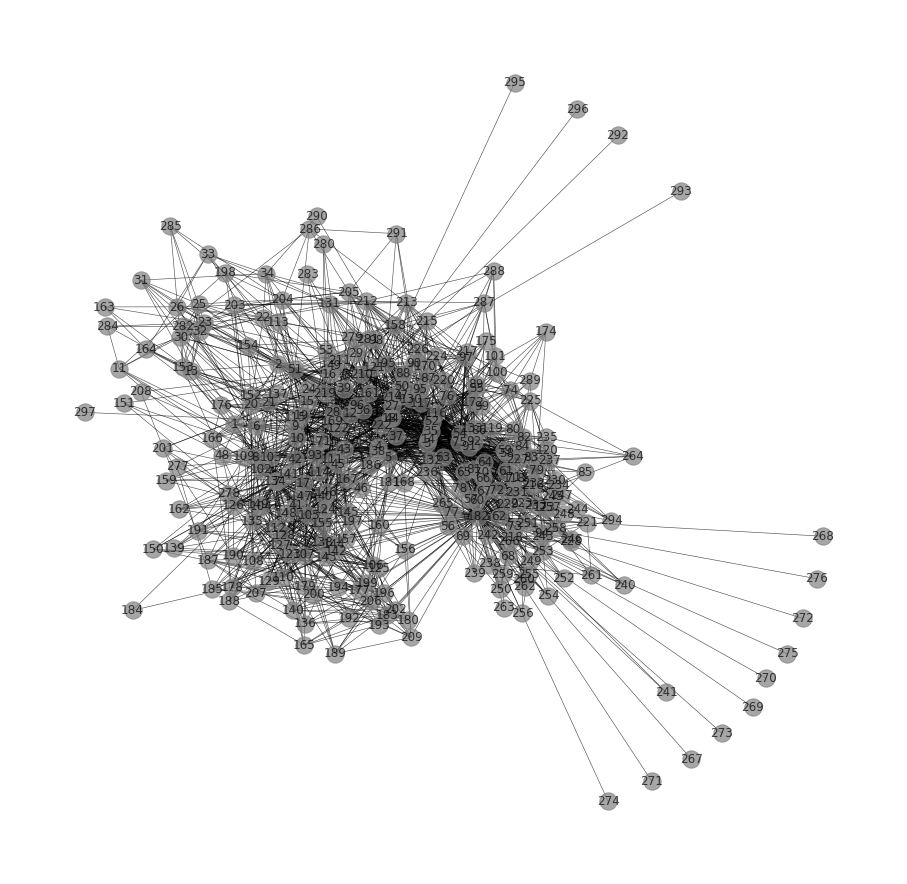

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request

print('Beginning file download with urllib2...')

url = 'http://konect.cc/files/download.tsv.dimacs10-celegansneural.tar.bz2'
urllib.request.urlretrieve(url, 'celegans.bz2')

import tarfile
tar = tarfile.open("celegans.bz2", "r:bz2")  
tar.extractall()
tar.close()

G = nx.read_weighted_edgelist("dimacs10-celegansneural/out.dimacs10-celegansneural",comments='%')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
nx.draw_spring(G, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()


### III.1 : Coefficient de clustering et largeur moyenne

La première étape consiste donc à calculer le coefficient de clustering et la largeur moyenne.
Pour la largeur moyenne, la fonction networkx `nx.average_shortest_path_length(G)` devrait faire le job efficacement. En revanche, nous allons calculer le coefficient de clustering moyen ensemble pour bien se le mettre dans la tête : rien ne vaut l'implémentation pour retenir un algo ou une formule.

In [109]:
#TODOTODO - average shortest path
print(nx.average_shortest_path_length(G))
print(nx.diameter(G))

2.455318955318955
5


Pour calculer le coefficient de clustering moyen, il faut déjà être en mesure de calculer le coefficient de clustering d'un sommet. Puis, il suffira d'itérer sur tous les sommets et de calculer la moyenne des valeurs avec `np.mean` du package numpy importé avec `import numpy as np`.

Pour calculer le coefficient de clustering d'un sommet : 
- `voisins = set(G.neighbors(u))` permet d'obtenir l'ensemble des voisins du sommet u
- `taille = len(voisins)` retourne la taille de cet ensemble
- `(taille * (taille - 1))/2` retourne le nombre maximal d'arêtes possible parmi les voisins du sommet
- il est possible de faire l'intersection de deux set `a` et `b` avec `a.intersection(b)` qui retourne un autre set

In [128]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO - Coefficient de clustering de tous les sommets
coefs = []
for u in G.nodes():
    voisinsu = set(G.neighbors(u))
    taille = len(voisinsu)
    nb_max = (taille * (taille - 1))/2
    if nb_max > 0:
        aretes = 0
        for v in voisinsu:
            voisinsv=set(G.neighbors(v))
            aretes += len(voisinsu.intersection(voisinsv))
        coefs.append(aretes/(2*nb_max))
    else:
        coefs.append(0)
np.mean(coefs)

0.2923632978321902

In [129]:
# Doit retourner true
round(np.mean(coefs),8) == round(nx.average_clustering(G),8)

True

Rappelez le nombre de sommets et d'arêtes du graphe ainsi que le degré moyen de ce graphe.

In [30]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO 


297
2148
14.464646464646465


### III.2 : Modélisation

Le modèle de Watts-Strogatz est géré via 3 paramètres : 
- n le nombre de sommets que nous allons donc fixer en utilisant le nombre de sommets dans C. Elegans
- k le degré des sommets que nous allons fixer en utilisant le degré moyen dans C. Elegans
- p qu'il faut fixer en fonction des valeurs du coefficient de clustering et de largeur moyenne

Nous allons donc procéder ainsi :
Avec n et k fixés, nous allons faire varier *p* en l'augmentant progressivement, de 0.1 à 0.5. Pour chaque *p*, nous allons générer 50 graphes de Watts-Strogatz et calculer leur largeur moyenne et coefficient de clustering moyen. Nous choisirons le *p* qui semble le mieux correspondre aux valeurs observées dans C. Elegans. Plus *p* augmente, plus le coefficient de clustering moyen diminue, plus la largeur moyenne diminue.

Pour cela, vous pouvez utiliser `nx.watts_strogatz_graph`. Pour savoir comment fonctionne la méthode, taper `nx.watts_strogatz_graph?` dans une cellule : la doc apparait. `nx.watts_strogatz_graph??` ferait apparaitre le code source !

Quelle valeur de *p* vous semble convenir le mieux ?
 

In [ ]:
#TODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODOTODO
for p in range(1,5):
    Cs=[]
    Ls=[]
    for i in range(50):
        G=nx.watts_strogatz_graph(297,14,p/10)
        Cs.append(nx.average_clustering(G))
        Ls.append(nx.average_shortest_path_length(G))
    print(f"p : {p}, C : {np.mean(Cs)},L : {np.mean(Ls)} ")

p : 1, C : 0.5119379752210694,L : 2.996858676858677 
p : 2, C : 0.3654876251173746,L : 2.7243466193466204 


### Exercice IV : Graphes de co-occurrences

Dans cet exercice, nous allons créer un graphe de co-occurrences de mots et le visualiser. Le texte qui sera utilisé pour créer ce graphe sera extrait directement de la page wikipedia sur la théorie des graphes. Pour cela, nous fournissons une partie du code qui vous aidera à créer ce graphe de co-occurrences. Il vous faut installer le package `wikipedia` avec `pip --user install wikipedia` dans le terminal linux.
Le code que nous fournissons est fait de 7 petites étapes qui vous serviront à implémenter la huitième : 
1. Récupérer le texte de la page wikipedia
2. En supprimer la ponctuation
3. Récupérer tous les mots contenus dans le texte de la page
4. Supprimer les mots inutiles, de syntaxes
5. Obtenir le nombre d'apparitions de chaque mot dans le texte
6. Récupérer les 70 mots les plus fréquents : ils constituent notre vocabulaire. Le chiffre de 70 est modifiable, mais on évite des chiffres trop gros pour garder un graphe visualisable dans cet exercice. Ces 70 mots constituent notre vocabulaire
7. Obtenir les phrases du document
8. Création du graphe de co-occurrences

Maintenant, à vous de jouer pour implémenter l'étape 8 ! 

#### Les sommets
Les mots du vocabulaire de l'étape 6 seront les sommets du graphes que vous allez créer avec networkx. Tous les autres mots que vous détecterez dans les phrases de l'étape 7 ne seront pas inclus dans le graphe. 

#### Les arêtes pondérées
On ajoutera une arête de poids 1 entre deux mots s'ils apparaissent ensemble dans une phrase obtenue à l'étape 7. S'ils apparaissent à nouveau ensemble dans une autre phrase, on augmentera le poids de l'arête dans le graphe d'une valeur *1*. Et ainsi de suite jusqu'à avoir parcouru toutes les phrases.
Pour cela, vous pouvez utiliser `add_edge(u,v, weight=1)` pour créer une arête de poids 1, puis `G[u][v]['weight']+=1` pour l'incrémenter.

In [3]:
#Étape 1 : Récupère dans la variable text le contenu de la page wikipedia
import wikipedia
wikipedia.set_lang("fr")
wiki = wikipedia.page('Théorie_des_graphes')
text = wiki.content
text=text.replace("=","")
text=text.replace("\n","")
text[:2000]

"La théorie des graphes est la discipline mathématique et informatique qui étudie les graphes, lesquels sont des modèles abstraits de dessins de réseaux reliant des objets. Ces modèles sont constitués par la donnée de sommets (aussi appelés nœuds ou points, en référence aux polyèdres), et d'arêtes (aussi appelées liens ou lignes) entre ces sommets ; ces arêtes sont parfois non-symétriques (les graphes sont alors dits orientés) et sont appelées des flèches ou des arcs.Les algorithmes élaborés pour résoudre des problèmes concernant les objets de cette théorie ont de nombreuses applications dans tous les domaines liés à la notion de réseau (réseau social, réseau informatique, télécommunications, etc.) et dans bien d'autres domaines (par exemple génétique) tant le concept de graphe, à peu près équivalent à celui de relation binaire (à ne pas confondre donc avec graphe d'une fonction), est général. De grands théorèmes difficiles, comme le théorème des quatre couleurs, le théorème des graphe

In [4]:
#Étape 2 : Supprime la ponctuation
import string
text_sans_ponctuation = text.translate(str.maketrans('', '', string.punctuation))
text_sans_ponctuation[:2000]

'La théorie des graphes est la discipline mathématique et informatique qui étudie les graphes lesquels sont des modèles abstraits de dessins de réseaux reliant des objets Ces modèles sont constitués par la donnée de sommets aussi appelés nœuds ou points en référence aux polyèdres et darêtes aussi appelées liens ou lignes entre ces sommets  ces arêtes sont parfois nonsymétriques les graphes sont alors dits orientés et sont appelées des flèches ou des arcsLes algorithmes élaborés pour résoudre des problèmes concernant les objets de cette théorie ont de nombreuses applications dans tous les domaines liés à la notion de réseau réseau social réseau informatique télécommunications etc et dans bien dautres domaines par exemple génétique tant le concept de graphe à peu près équivalent à celui de relation binaire à ne pas confondre donc avec graphe dune fonction est général De grands théorèmes difficiles comme le théorème des quatre couleurs le théorème des graphes parfaits ou encore le théorèm

In [5]:
#Étape 3 : Sépare le texte en mots
text_motamot = text_sans_ponctuation.split(" ")
text_motamot[:20]

['La',
 'théorie',
 'des',
 'graphes',
 'est',
 'la',
 'discipline',
 'mathématique',
 'et',
 'informatique',
 'qui',
 'étudie',
 'les',
 'graphes',
 'lesquels',
 'sont',
 'des',
 'modèles',
 'abstraits',
 'de']

In [6]:
#Étape 4 : Supprime les mots de syntaxe: et, ou, le, etc

#4.1 Télécharge la liste des mots de syntaxe
import urllib
urllib.request.urlretrieve('https://raw.githubusercontent.com/Fantomas42/mots-vides/develop/mots_vides/datas/french.txt', 'stopwords.txt')
fichier = open('stopwords.txt')
stopwords=set()
for ligne in fichier:
    stopwords.add(ligne.strip())
fichier.close()

#4.2 Supprime les mots de syntaxes
text_without_stopwords = [f.lower() for f in text_motamot if f.lower() not in stopwords and len(f) > 1]
text_without_stopwords[:20]

['théorie',
 'graphes',
 'discipline',
 'mathématique',
 'informatique',
 'étudie',
 'graphes',
 'modèles',
 'abstraits',
 'dessins',
 'réseaux',
 'reliant',
 'objets',
 'modèles',
 'constitués',
 'donnée',
 'sommets',
 'appelés',
 'nœuds',
 'points']

In [7]:
#Étape 5 : Obtenir les mots les plus fréquents
import collections
dico =collections.Counter(text_without_stopwords)
dico.most_common(10)

[('displaystyle', 97),
 ('graphe', 92),
 ('graphes', 58),
 ('sommets', 56),
 ('sommet', 34),
 ('dun', 32),
 ('problème', 25),
 ('arête', 24),
 ('lon', 20),
 ('arêtes', 19)]

In [16]:
#Étape 6 : Établissement du vocabulaire utilisé pour le graphe, les 70 mots les plus fréquents du texte
vocabulaire = dico.most_common(70)
vocabulaire = [x[0] for x in vocabulaire]
vocabulaire[:10]

['displaystyle',
 'graphe',
 'graphes',
 'sommets',
 'sommet',
 'dun',
 'problème',
 'arête',
 'lon',
 'arêtes']

In [17]:
#Étape 7 : Récupération des phrases
import re
sentences = re.split(r' *[\.\?!][\'"\)\]]* *', text)
sentences=[s.translate(str.maketrans('', '', string.punctuation)) for s in sentences]
sentences[:10]

['La théorie des graphes est la discipline mathématique et informatique qui étudie les graphes lesquels sont des modèles abstraits de dessins de réseaux reliant des objets',
 'Ces modèles sont constitués par la donnée de sommets aussi appelés nœuds ou points en référence aux polyèdres et darêtes aussi appelées liens ou lignes entre ces sommets  ces arêtes sont parfois nonsymétriques les graphes sont alors dits orientés et sont appelées des flèches ou des arcs',
 'Les algorithmes élaborés pour résoudre des problèmes concernant les objets de cette théorie ont de nombreuses applications dans tous les domaines liés à la notion de réseau réseau social réseau informatique télécommunications etc',
 'et dans bien dautres domaines par exemple génétique tant le concept de graphe à peu près équivalent à celui de relation binaire à ne pas confondre donc avec graphe dune fonction est général',
 'De grands théorèmes difficiles comme le théorème des quatre couleurs le théorème des graphes parfaits ou

In [18]:
#ETAPE 8 - CRÉATION DU GRAPHE DE CO-OCCURRENCES
import networkx as nx
vocabulaire=set(vocabulaire)
G=nx.Graph()
#TODOTODOTODOTODOTODOTODOTODOTODO
#TODOTODOTODOTODOTODOTODOTODOTODO
#TODOTODOTODOTODOTODOTODOTODOTODO
#TODOTODOTODOTODOTODOTODOTODOTODOs
        

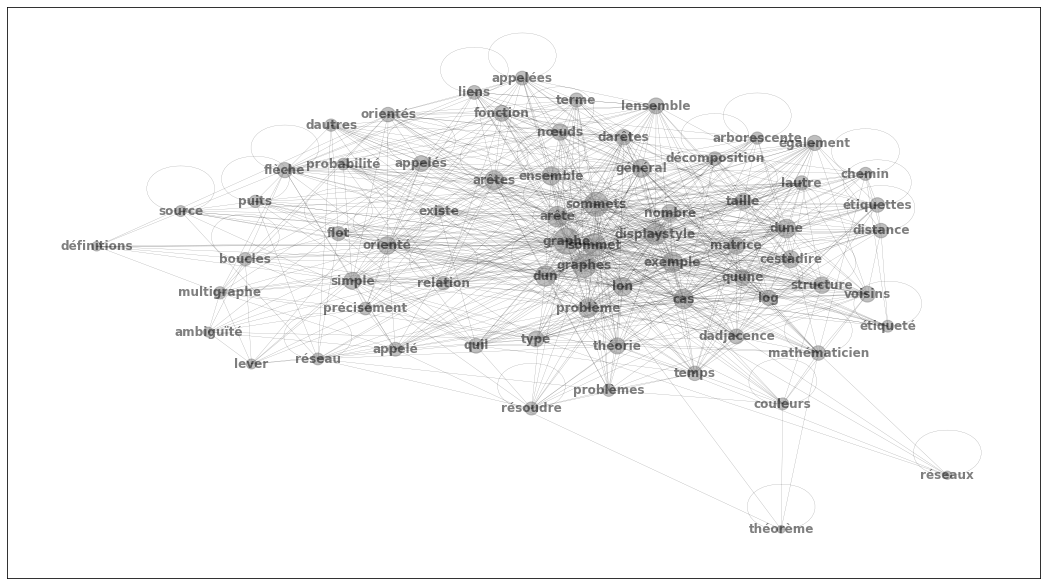

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

degrees = [val*10 for (node, val) in G.degree()]

options = {"node_color": "gray", "node_size": degrees, "width": 0.2, "with_labels":True, "font_color":"black", "font_weight":"bold", "ax":ax, "alpha": 0.5}
pos = nx.spring_layout(G,seed=1969)  # Seed for reproducible layout

nx.draw_networkx(G, pos,**options)
plt.show()